In [77]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
def get_boundaries(file):
    count4 = 0
    count6 = 0
    with open('processed_data/innings/' + file, 'r') as rf:
#         print(rf.readlines())
        try:
            data = json.load(rf)
        except Exception as e:
            return (0,0)
        for item in data:
#             print(item.keys())
            details = list(item.values())
#             print(list(details))
            runs = details[0]['runs']['batsman']
            if runs == 4:
                count4 += 1
            elif runs == 6:
                count6 += 1
                
    return (count4, count6)
            
            

In [79]:
columns=['name','id','toss','toss_decision','fours','sixes', 'win', 'date', 'man_of_the_match']
match_data = pd.DataFrame()
for f in os.listdir('processed_data/matches'):
    file = 'processed_data/matches/'+ f
    with open(file, 'r') as rf:
        data = json.load(rf)
        inn_id = data['id']
        team1 = []
        team2= []
        team1.append(data['team1'])
        team2.append(data['team2'])
        team1.append(data['id'])
        team2.append(data['id'])
        if data['toss_winner'] == team1[0]:
            team1.append(1)
            team2.append(0)
            team1.append(data['toss_decision'])
            team2.append('toss lost')
        else:
            team1.append(0)
            team2.append(1)
            team2.append(data['toss_decision'])
            team1.append('toss lost')


        inn_file1 = inn_id + '_1st_inn.json'
        inn_file2 = inn_id + '_2nd_inn.json'
        
        inn1_4, inn1_6 = get_boundaries(inn_file1)
        inn2_4, inn2_6 = get_boundaries(inn_file2)
        
        if team1[3]!='toss lost':
            if team1[3] == 'field':
                team1.append(inn2_4)
                team1.append(inn2_6)
                team2.append(inn1_4)
                team2.append(inn1_6)
            else:
                team2.append(inn2_4)
                team2.append(inn2_6)
                team1.append(inn1_4)
                team1.append(inn1_6)
        else:
            if team2[3] == 'field':
                team2.append(inn2_4)
                team2.append(inn2_6)
                team1.append(inn1_4)
                team1.append(inn1_6)
            else:
                team1.append(inn2_4)
                team1.append(inn2_6)
                team2.append(inn1_4)
                team2.append(inn1_6)
                
                
        if data['winner'] == team1[0]:
            team1.append(1)
            team2.append(0)
        else:
            team2.append(1)
            team1.append(0)
        
        team1.append(data['date'])
        team2.append(data['date'])
        
        team1.append(data['player_of_match'])
        team2.append(data['player_of_match'])
        
#         print(team1)
#         print(len(team1), len(team2))
#         df = pd.DataFrame(team1, columns=['name','id','toss','toss_decision','fours','sixes', 'win', 'date', 'man_of_the_match'])
#         print(df)
        match_data = match_data.append(pd.Series(team1, index=columns), ignore_index=True)
        match_data = match_data.append(pd.Series(team2, index=columns), ignore_index=True)
#         print(match_data)
                
    

In [80]:
match_data.head()

,date,fours,id,man_of_the_match,name,sixes,toss,toss_decision,win
0,2017-04-05,17.0,1082591,Yuvraj Singh,Sunrisers Hyderabad,9.0,0.0,toss lost,1.0
1,2017-04-05,15.0,1082591,Yuvraj Singh,Royal Challengers Bangalore,8.0,1.0,field,0.0
2,2017-04-06,18.0,1082592,SPD Smith,Rising Pune Supergiant,6.0,1.0,field,1.0
3,2017-04-06,12.0,1082592,SPD Smith,Mumbai Indians,11.0,0.0,toss lost,0.0
4,2017-04-07,20.0,1082593,CA Lynn,Gujarat Lions,6.0,0.0,toss lost,0.0


In [81]:
match_data['name'] = np.where(match_data['name']=='Rising Pune Supergiant', 'Rising Pune Supergiants',match_data['name'])
match_data['name'] = np.where(match_data['name']=='Delhi Daredevils', 'Delhi Capitals',match_data['name'])

#  Team Analysis Across Seasons

In [82]:
match_data['season'] = match_data['date'].apply(lambda x: x.split('-')[0])
match_data.head()

,date,fours,id,man_of_the_match,name,sixes,toss,toss_decision,win,season
0,2017-04-05,17.0,1082591,Yuvraj Singh,Sunrisers Hyderabad,9.0,0.0,toss lost,1.0,2017
1,2017-04-05,15.0,1082591,Yuvraj Singh,Royal Challengers Bangalore,8.0,1.0,field,0.0,2017
2,2017-04-06,18.0,1082592,SPD Smith,Rising Pune Supergiants,6.0,1.0,field,1.0,2017
3,2017-04-06,12.0,1082592,SPD Smith,Mumbai Indians,11.0,0.0,toss lost,0.0,2017
4,2017-04-07,20.0,1082593,CA Lynn,Gujarat Lions,6.0,0.0,toss lost,0.0,2017


In [126]:
fours_group = match_data.groupby(['season', 'name'])

In [128]:
fours_group = fours_group['fours'].sum()

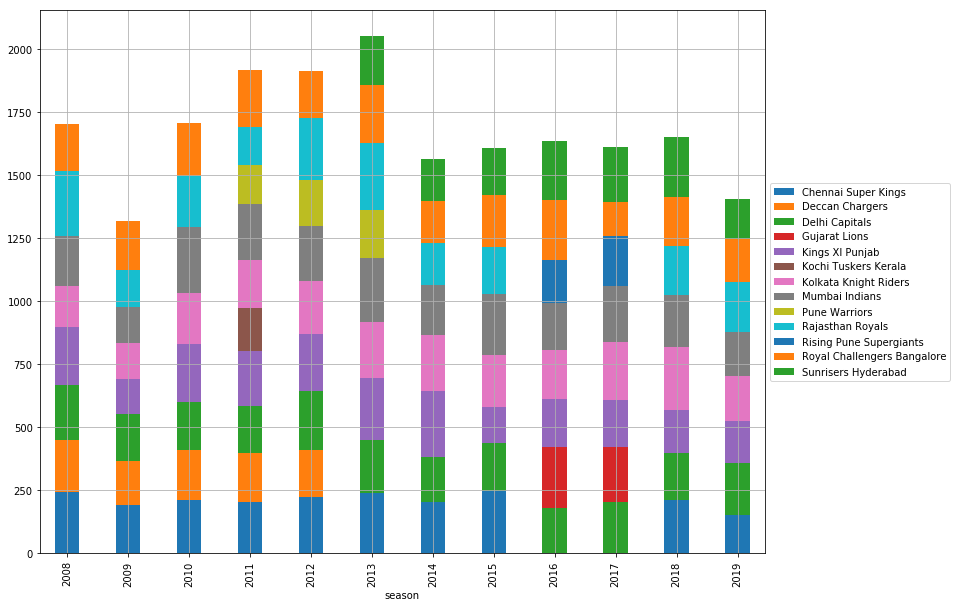

season
2008               Rajasthan Royals
2009            Chennai Super Kings
2010                 Mumbai Indians
2011    Royal Challengers Bangalore
2012               Rajasthan Royals
2013               Rajasthan Royals
2014                Kings XI Punjab
2015            Chennai Super Kings
2016                  Gujarat Lions
2017          Kolkata Knight Riders
2018          Kolkata Knight Riders
2019                 Delhi Capitals
dtype: object


In [133]:
fours_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,10), width=0.4).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(fours_group.unstack().idxmax(axis=1))

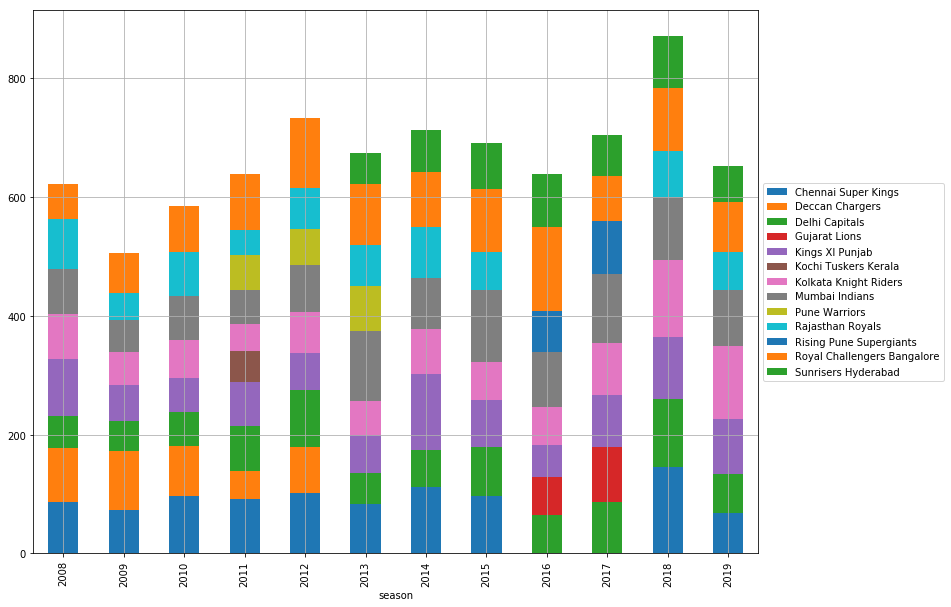

season
2008                Kings XI Punjab
2009                Deccan Chargers
2010            Chennai Super Kings
2011    Royal Challengers Bangalore
2012    Royal Challengers Bangalore
2013                 Mumbai Indians
2014                Kings XI Punjab
2015                 Mumbai Indians
2016    Royal Challengers Bangalore
2017                 Mumbai Indians
2018            Chennai Super Kings
2019          Kolkata Knight Riders
dtype: object


In [130]:
sixes_group = match_data.groupby(['season', 'name'])
sixes_group = sixes_group['sixes'].sum()
sixes_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,10)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(sixes_group.unstack().idxmax(axis=1))

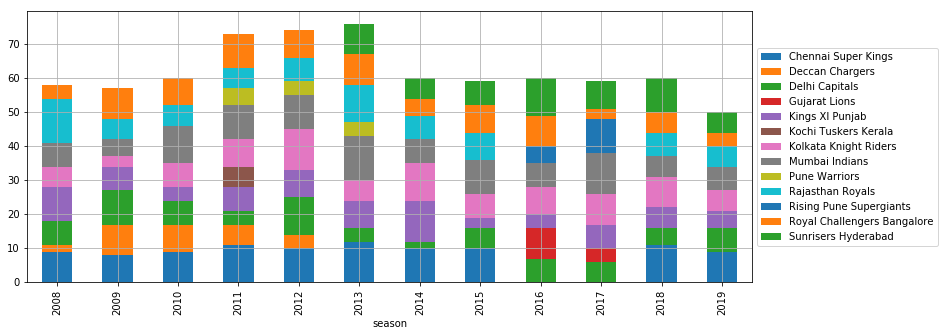

season
2008         Rajasthan Royals
2009           Delhi Capitals
2010           Mumbai Indians
2011      Chennai Super Kings
2012    Kolkata Knight Riders
2013           Mumbai Indians
2014          Kings XI Punjab
2015      Chennai Super Kings
2016      Sunrisers Hyderabad
2017           Mumbai Indians
2018      Chennai Super Kings
2019      Chennai Super Kings
dtype: object


In [125]:
wins_group = match_data.groupby(['season','name'])
wins_group = wins_group['win'].sum()
wins_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,5)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(wins_group.unstack().idxmax(axis=1))

If you look at the results two of the teams in IPL i.e is MI and CSK have won most matches for 3 and 4 yrs respectively
making them one of the most successful teams of the IPL

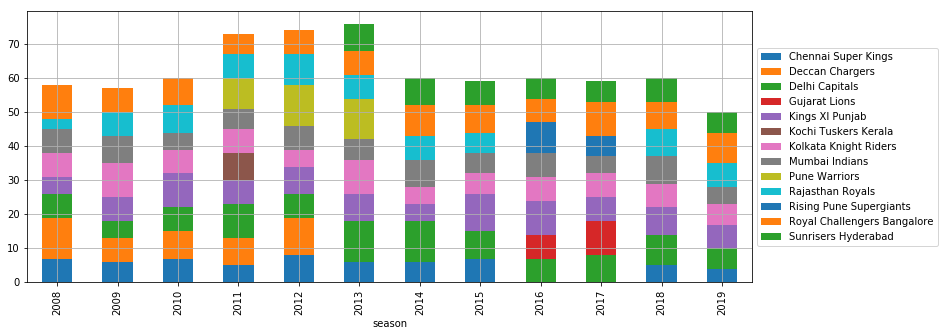

season
2008                Deccan Chargers
2009          Kolkata Knight Riders
2010                Kings XI Punjab
2011                 Delhi Capitals
2012                  Pune Warriors
2013                 Delhi Capitals
2014                 Delhi Capitals
2015                Kings XI Punjab
2016                Kings XI Punjab
2017                  Gujarat Lions
2018                 Delhi Capitals
2019    Royal Challengers Bangalore
dtype: object


In [140]:
losse_data = match_data[match_data['win']==0]
losse_group = losse_data.groupby(['season', 'name'])
losse_group = losse_group['win'].count()
losse_group.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(13,5)).legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
print(losse_group.unstack().idxmax(axis=1))

Delhi Capitals have lost most number of matches in 4 seasons.

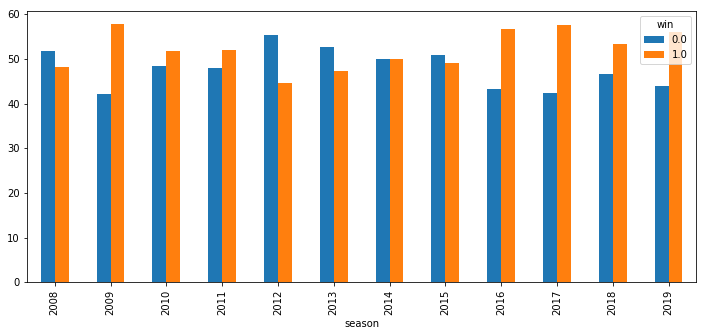

In [154]:
# print(len(match_data[(match_data['toss']==1) & (match_data['win']==1) & (match_data['season']=='2009')]))
tosswin_data = match_data[match_data['toss']==1]
tosswin_data = tosswin_data.groupby(['season'])['win'].value_counts(normalize=True)*100
tosswin_data.unstack().plot(kind='bar', figsize=(12,5))

Well it looks like in the recent 3 - 4 seasons teams those who have won the toss have won more than 50% of the times compared to earlier seasons. So winning toss surely can give you 50% chance of winning the game 

In [174]:
winner_data = match_data.sort_values('date',ascending=False).groupby('season')
for grp, grp_data in winner_data:
    final_match = grp_data.head(2)
    final_match = final_match[final_match['win']==1]
    print('Season: {} ; Winner: {}'.format(final_match['season'].values[0], final_match['name'].values[0]))

Season: 2008 ; Winner: Rajasthan Royals
Season: 2009 ; Winner: Deccan Chargers
Season: 2010 ; Winner: Chennai Super Kings
Season: 2011 ; Winner: Chennai Super Kings
Season: 2012 ; Winner: Kolkata Knight Riders
Season: 2013 ; Winner: Mumbai Indians
Season: 2014 ; Winner: Kolkata Knight Riders
Season: 2015 ; Winner: Mumbai Indians
Season: 2016 ; Winner: Sunrisers Hyderabad
Season: 2017 ; Winner: Mumbai Indians
Season: 2018 ; Winner: Chennai Super Kings
Season: 2019 ; Winner: Chennai Super Kings
